In [1]:
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt

In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
class Data:
    #
    # each Data object is initialized with a filepath; fields include:
    #
    # 'name' (string):         ID of sample.
    # 'x' (1D numpy array):    x coordinates.
    # 'y' (1D numpy array):    y coordinates.
    #
    def __init__(self, fn):
        self.x = []
        self.y = []
        f = open(fn, "r")
        file = enumerate(f)
        for i, line in file:
            words = line.split()
            if i == 1:
                self.name = words[2]
            if i >= 12 and len(words) > 0: # lines 13+ but no empty lines.
                self.x.append(float(words[0]))
                self.y.append(float(words[1]))
        f.close()
        self.x = np.array(self.x)
        self.y = np.array(self.y)
 
    def getNumPoints(self):
        return len(self.x)
    
    def scale(self, axis, factor):
        # multiplies every element of x or y axis by factor.
        if axis == 'x':
            self.x *= factor
        elif axis == 'y':
            self.y *= factor
            
    def center(self):
        # fixes offset due to dc voltage or other sources.
        # subtracts the mean y value from every y value.
        self.y -= mean(self.y)
    
    def bestFitSlope(self, start, end):
        # finds the slope of best fit line within start:end.
        x = self.x[start:end]
        y = self.y[start:end]
        m = (((mean(x)*mean(y)) - mean(x*y)) / ((mean(x)*mean(x)) - mean(x*x)))
        return m
    
    def addLine(self, m, positive=True):
        # adds (or subtracts) the line y=slope*x (through B=0 origin).

        for i in range(len(self.x)):
            if not positive:
                self.y[i] -= m*self.x[i]
            else:
                self.y[i] += m*self.x[i]

No handles with labels found to put in legend.


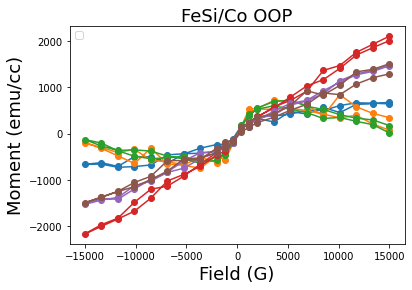

No handles with labels found to put in legend.


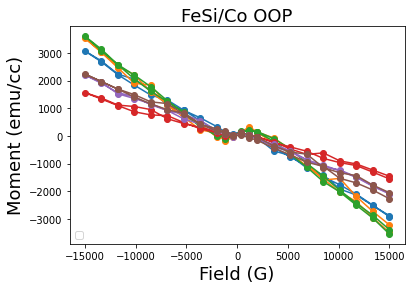

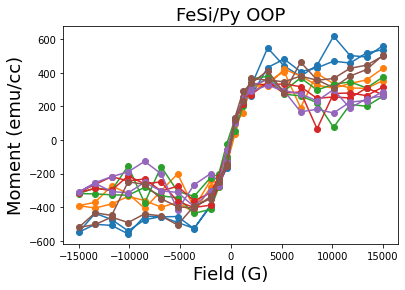

In [4]:
Py_OOP = ["20201113/20201113_JH245-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH246-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH247-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH248-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH249-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH250-Co_OOP_1p5T_5mm#1.txt",]
Co_OOP = ["20201106/20201106_JH245-Py_OOP_1p5T_5mm#2.txt",
        "20201106/20201106_JH246-Py_OOP_1p5T_5mm#4.txt",
        "20201106/20201106_JH247-Py_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH248-Py_OOP_1p5T_5mm#3.txt",
        "20201113/20201113_JH249-Py_OOP_1p5T_5mm#2.txt",
        "20201113/20201113_JH250-Py_OOP_1p5T_5mm#1.txt",]

Si = Data("20201113/20201113_Si_OOP_1p5T_5mm#1.txt")

volume = 0.5*0.5*4e-7                                   # volume of samples, in cm^3.

Si.scale('y', 1/volume)
Si.center()
m = Si.bestFitSlope(0, 4)
for file in Co_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.addLine(m, False)                                        # subtract out diamagentic effects from Si.
    data.center()
    plt.plot(data.x, data.y, 'o-')
    
plt.title('FeSi/Co OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="upper left")
plt.show()

for file in Co_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.center()
    plt.plot(data.x, data.y, 'o-')
    
plt.title('FeSi/Co OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="lower left")
plt.show()

for file in Py_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.addLine(m, False)                                        # subtract out diamagentic effects from Si.
    data.center()
    plt.plot(data.x, data.y, 'o-')

plt.title('FeSi/Py OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
#plt.legend(loc="lower left")
plt.show()

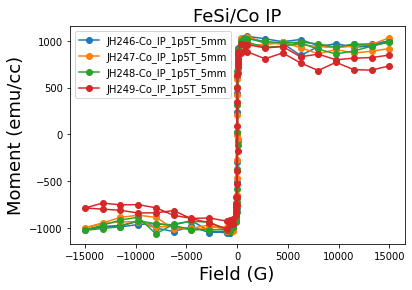

In [6]:
Co_IP = ["20201120/20201120_JH246-Co_IP_1p5T_5mm#1.txt",
        "20201120/20201120_JH247-Co_IP_1p5T_5mm#1.txt",
        "20201120/20201120_JH248-Co_IP_1p5T_5mm#1.txt",
        "20201120/20201120_JH249-Co_IP_1p5T_5mm#1.txt",
        "20201120/20201120_JH250-Co_IP_1p5T_5mm#1.txt"]

for file in Co_IP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 6)
    data.addLine(m, False)                                        # subtract out diamagentic effects from Si.
    data.center()
    plt.plot(data.x, data.y, 'o-', label=data.name)
    
plt.title('FeSi/Co IP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="upper left")
plt.show()